Explanation: 
This code plots the operational time for the compressors and the temperature in the cold storage from 1 to 5 degrees Celcius. 

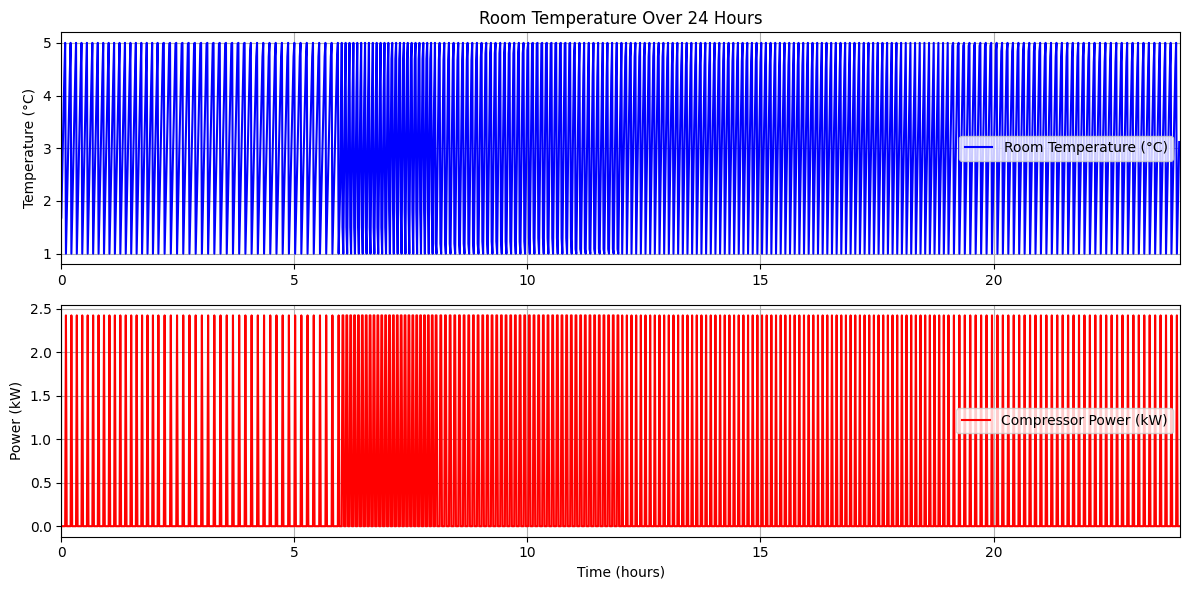

In [3]:
import numpy as np
import matplotlib.pyplot as plt


#Paramters below are constant, except the density of air. 

Rho = (1.287 + 1.268)/2 #kg/m^3, average density of air between 1 and 5°C
V = 22.5 # m^3, volume of the room 
Cp_air = 1005 # J/kg*K, specific heat capacity of air
C_air = Rho * V * Cp_air  # J/K 
delta_T = 4  # K, from 5°C to 1°C
Q_air = C_air * delta_T  # J, energy required for full cooling cycle
P_min = 1.212 * 1000 *2 # W, minimum compressor power for the two compressors

# Refrigeration load in April, 24 hours
Q_hour = np.array([
    330, 330, 320, 320, 300, 300, 740, 890,  590, 610, 640, 540, 
    450, 430, 440,  430, 420, 410, 390, 380, 370, 360, 350, 340])


minutes = 24 * 60
time = np.arange(minutes)
temp = np.zeros(minutes) #temperature
c_power = np.zeros(minutes) #compressor power

# Initial state
T_min, T_max = 1, 5
T = T_max
E = 0
cooling = False

for i in range(minutes):
    hour = i // 60
    Q_gain = Q_hour[hour]

    if cooling:
        net_p = P_min - Q_gain #net power
        E -= net_p * 60
        c_power[i] = P_min
        if E <= 0:
            E = 0
            T = T_min
            cooling = False
    else:
        E += Q_gain * 60
        c_power[i] = 0
        if E >= Q_air:
            E = Q_air
            T = T_max
            cooling = True

    temp[i] = T_min + (E / Q_air) * (T_max - T_min)


plt.figure(figsize=(12, 6))

plt.subplot(2, 1, 1)
plt.plot(time / 60, temp, label='Room Temperature (°C)', color='blue')
plt.ylabel("Temperature (°C)")
plt.title("Room Temperature Over 24 Hours")
plt.grid(True)
plt.legend()
plt.xlim(0, 24)

plt.subplot(2, 1, 2)
plt.plot(time / 60, c_power / 1000, label='Compressor Power (kW)', color='red')
plt.ylabel("Power (kW)")
plt.xlabel("Time (hours)")
plt.grid(True)
plt.legend()
plt.xlim(0, 24)

plt.tight_layout()
plt.show()
